# Preprocessing data

In [1]:
!wget https://storage.googleapis.com/gtex_analysis_v8/rna_seq_data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_reads.gct.gz
!wget https://storage.googleapis.com/gtex_analysis_v8/annotations/GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt
!gzip -d *gz

--2022-04-22 23:18:17--  https://storage.googleapis.com/gtex_analysis_v8/rna_seq_data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_reads.gct.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 917091994 (875M) [application/octet-stream]
Saving to: ‘GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_reads.gct.gz’

GTEx_Analysis_2017- 100%[===================>] 874.61M   116MB/s    in 7.8s    

2022-04-22 23:18:26 (112 MB/s) - ‘GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_reads.gct.gz’ saved [917091994/917091994]

--2022-04-22 23:18:26--  https://storage.googleapis.com/gtex_analysis_v8/annotations/GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 173.194.79.128, 108.177.119.128, ...
Connecting t

In [2]:
import pandas as pd
import numpy as np

In [4]:
all_data = pd.read_csv('GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_reads.gct', skiprows=2, sep='\t' )
attr = pd.read_csv("GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt", sep='\t')

In [5]:
all_data.head(2)

,Name,Description,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2526-SM-5GZY6,...,GTEX-ZZPU-1126-SM-5N9CW,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1426-SM-5GZZ6,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2426-SM-5E44I,GTEX-ZZPU-2626-SM-5E45Y,GTEX-ZZPU-2726-SM-5NQ8O
0,ENSG00000223972.5,DDX11L1,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,1,1
1,ENSG00000227232.5,WASH7P,187,109,143,251,113,139,199,473,...,72,96,136,79,89,86,49,84,34,66


In [6]:
print('original shape: ', all_data.shape)

original shape:  (56200, 17384)


In [7]:
all_data.index = all_data.Name
all_data.drop(columns=['Name','Description'], inplace=True)

In [8]:
non_expressed_gene = (all_data < 10).astype(int).sum(axis=1) #count how many samples with less than 5 reads
all_data = all_data[non_expressed_gene < all_data.shape[1]*0.75]

#save all gene ID for later use
np.save('/content/drive/MyDrive/muscle_promoter/training_data/selected_index.npy', all_data.index)

print('shape of trimmed dataframe: ', all_data.shape)

shape of trimmed dataframe:  (23075, 17382)


# train-val-test split

In [10]:
all_data = all_data.div(all_data.sum(axis=0), axis=1)*1000000 #count per million

all_data = np.array(all_data.T)
np.random.shuffle(all_data)

all_data

array([[1.29285439e+00, 2.62065079e-01, 2.09652063e-01, ...,
        1.20268653e+03, 1.92181058e-01, 1.74298610e+04],
       [5.51817831e-01, 4.95221130e-01, 4.38624430e-01, ...,
        2.01611597e+03, 8.63099684e-01, 1.19349849e+04],
       [2.17912950e+00, 2.40575897e+00, 1.20287948e+00, ...,
        4.31589672e+02, 6.97321440e-02, 4.60322802e+03],
       ...,
       [4.86795973e-01, 2.05952142e-01, 2.90205292e-01, ...,
        7.60840574e+03, 3.19225821e+00, 3.11221397e+04],
       [4.33864031e+00, 1.73964805e+00, 1.38333459e+00, ...,
        3.64162831e+03, 1.42525382e+00, 1.36546023e+04],
       [7.93696258e-01, 6.67712725e-01, 4.03147306e-01, ...,
        5.82676360e+03, 8.88183907e+00, 2.29976010e+04]])

In [11]:
X_test = all_data[0:200]
X_val = all_data[200:3500]
X_train = all_data[3500:len(all_data)]

print(X_train.shape, X_test.shape)

np.save('/content/drive/MyDrive/muscle_promoter/training_data/X_train.npy', X_train)
np.save('/content/drive/MyDrive/muscle_promoter/training_data/X_val.npy', X_val)
np.save('/content/drive/MyDrive/muscle_promoter/training_data/X_test.npy', X_test)

(13882, 23075) (200, 23075)


# Training Deep autoencoder for all blood samples

In [44]:
import numpy as np
import pandas as pd


blood = pd.read_csv('/content/drive/MyDrive/muscle_promoter/training_data/blood_read_count.txt', sep='\t')
blood.index = blood.Name
blood.drop(columns=['Name', 'Description'], inplace=True)

non_expressed_gene = (blood < 10).astype(int).sum(axis=1) #count how many samples with less than 5 reads
blood = blood[non_expressed_gene < blood.shape[1]*0.75]
np.save('/content/drive/MyDrive/muscle_promoter/training_data/blood_selected_index.npy', blood.index)

blood = blood.div(blood.sum(axis=0), axis=1)*1000000 #count per million
blood = np.array(blood)
blood = blood.T
np.random.shuffle(blood)

blood_val = blood[0:125]
blood_train = blood[125:len(blood)]

print(blood_train.shape, blood_val.shape)


np.save('/content/drive/MyDrive/muscle_promoter/training_data/blood_train.npy', blood_train)
np.save('/content/drive/MyDrive/muscle_promoter/training_data/blood_val.npy', blood_val)

(804, 19431) (125, 19431)


In [45]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.layers import Input, Dense, Layer, Activation, BatchNormalization
from keras.models import Model
from keras import backend as K
from keras.callbacks import Callback
from keras import regularizers

#define autoencoder model

def autoencoder_model(original_dim=23075, intermediate1_dim=512, intermediate2_dim=256, latent_dim=32, l1=10e-5, lr=0.0025):
  x = Input(shape=(original_dim, ))

  net = Dense(intermediate1_dim, activity_regularizer=regularizers.l1(l1))(x)
  net2 = BatchNormalization()(net)
  net3 = Activation('relu')(net2)

  net4 = Dense(intermediate2_dim, activity_regularizer=regularizers.l1(l1))(net3)
  net5 = BatchNormalization()(net4)
  net6 = Activation('relu')(net5)

  z = Dense(latent_dim, activation='relu', activity_regularizer=regularizers.l1(l1))(net6)

  #Define decoder
  decoder_h = Dense(intermediate2_dim, activation='relu', activity_regularizer=regularizers.l1(l1))
  decoder_h2 = Dense(intermediate1_dim, activation='relu', activity_regularizer=regularizers.l1(l1))
  decoder_mean = Dense(original_dim)

  h_decoded = decoder_h(z)
  h_decoded2 = decoder_h2(h_decoded)
  x_decoded_mean = decoder_mean(h_decoded2)

  autoencoder =  Model(x, x_decoded_mean)
  
  optimizer=tf.keras.optimizers.Adam(lr=lr)
  autoencoder.compile(optimizer=optimizer, loss='mse')

  return autoencoder

In [ ]:
for latent_dim in [128, 64, 32, 16]:
  original_dim = len(blood_train[0])
  lr=0.0025
  autoencoder = autoencoder_model(original_dim=original_dim, 
                                  intermediate1_dim=512, intermediate2_dim=256, 
                                  latent_dim=latent_dim, 
                                  l1=10e-5, lr=lr)
  
  early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=200, mode='min')
  checkpoint = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/muscle_promoter/GTEx8_blood_autoencoder_latent{}_lr{}.h5'.format(latent_dim,lr), 
                                               monitor='val_loss', mode='min',
                                               verbose=1, save_best_only=True) 

  autoencoder.fit(blood_train, blood_train,
                  validation_data = [blood_val, blood_val],
                  epochs=10000,
                  batch_size=100,
                  callbacks=[early_stop, checkpoint],
                  )

Epoch 1/10000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Streaming output truncated to the last 5000 lines.
9/9 [==============================] - 1s 152ms/step - loss: 66987.9453 - val_loss: 84773.5078
Epoch 67/10000
9/9 [==============================] - ETA: 0s - loss: 69411.5781
Epoch 67: val_loss did not improve from 64015.48047
9/9 [==============================] - 1s 152ms/step - loss: 69411.5781 - val_loss: 71495.8125
Epoch 68/10000
9/9 [==============================] - ETA: 0s - loss: 76946.7500
Epoch 68: val_loss did not improve from 64015.48047
9/9 [==============================] - 1s 158ms/step - loss: 76946.7500 - val_loss: 68132.6250
Epoch 69/10000
9/9 [==============================] - ETA: 0s - loss: 68604.4844
Epoch 69: val_loss did not improve from 64015.48047
9/9 [==============================] - 1s 166ms/step - loss: 68604.4844 - val_loss: 65908.2656
Epoch 70/10000
9/9 [==============================] - ETA: 0s - loss: 70801.8281
Epoch 70: val_loss did not improve from 64015.48047
9/9 [==============================] 

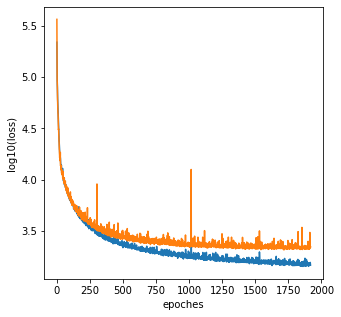

In [7]:
def plot_track_autoencoder(history):
  import matplotlib.pyplot as plt

  fig = plt.figure(figsize=(5,5))

  #plt.subplot(1, 1, 1)
  plt.plot(np.log10(history.history['loss']), label='train')
  plt.plot(np.log10(history.history['val_loss']), label='Validation')
  plt.ylabel('log10(loss)')
  plt.xlabel('epoches')
  plt.show()


plot_track_autoencoder(history)

# Validate autoencoder

In [8]:
import numpy as np

X_train = np.load('/content/drive/MyDrive/muscle_promoter/training_data/X_train.npy', allow_pickle=True)
X_val = np.load('/content/drive/MyDrive/muscle_promoter/training_data/X_val.npy', allow_pickle=True)
X_test = np.load('/content/drive/MyDrive/muscle_promoter/training_data/X_test.npy', allow_pickle=True)

print(X_train.shape, X_val.shape, X_test.shape)

(13882, 23075) (3300, 23075) (200, 23075)


In [9]:
from tensorflow import keras
autoencoder = keras.models.load_model('/content/drive/MyDrive/muscle_promoter/GTEx8_autoencoder_latent{}_lr{}.h5'.format(latent_dim,lr))
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 23075)]           0         
                                                                 
 dense_6 (Dense)             (None, 512)               11814912  
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                           

In [10]:
X_train_pred = autoencoder.predict(X_train)
X_val_pred = autoencoder.predict(X_val)
X_test_pred = autoencoder.predict(X_test)

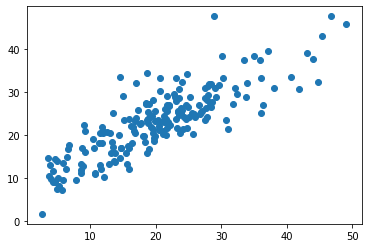

In [11]:
import matplotlib.pyplot as plt

i=1000
plt.scatter(X_test.T[i], X_test_pred.T[i])
plt.show()


In [12]:
from sklearn.metrics import r2_score

print(
    r2_score(X_train, X_train_pred, multioutput='variance_weighted'),
    r2_score(X_val, X_val_pred, multioutput='variance_weighted'),
    r2_score(X_test, X_test_pred, multioutput='variance_weighted')
)

0.9956588664246631 0.9923252035993105 0.993183303728136


In [13]:
def mean_corr_spearmanr(X_test, X_test_pred):
  from scipy.stats import spearmanr
  r=[]
  for i in range(len(X_test)):
    rho = spearmanr(X_test.T[i], X_test_pred.T[i])[0]
    r.append(rho)
  return sum(r)/len(r)
  
print(mean_corr_spearmanr(X_train, X_train_pred), 
      mean_corr_spearmanr(X_val, X_val_pred), 
      mean_corr_spearmanr(X_test, X_test_pred))

0.6302069700758284 0.6196362205513735 0.6416161302260902


In [14]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(X_train, X_train_pred), 
      mean_squared_error(X_val, X_val_pred), 
      mean_squared_error(X_test, X_test_pred))

1007.6694235680283 1836.5169099312116 1667.8297232661248


In [15]:
#extract latent space
from tensorflow import keras
from keras.models import Model

latent_dim=16
lr=0.001

autoencoder = keras.models.load_model('/content/drive/MyDrive/muscle_promoter/GTEx8_autoencoder_latent{}_lr{}.h5'.format(latent_dim,lr))

#extract encoder layers
encoder = Model(autoencoder.input, autoencoder.layers[-4].output)
latent = encoder.predict(X_test)

In [16]:
latent[150]

array([ 9.217502 , 15.42195  , 21.233793 , 16.495459 , 24.925592 ,
       24.375204 ,  8.738856 , 10.484871 , 18.994606 , 13.996792 ,
       15.397069 , 11.946452 , 18.322275 , 13.317034 , 21.69686  ,
        0.6346834], dtype=float32)

# blood and heart ratio

In [3]:
import pandas as pd
import numpy as np

In [4]:
!wget https://storage.googleapis.com/gtex_analysis_v8/rna_seq_data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_reads.gct.gz
!wget https://storage.googleapis.com/gtex_analysis_v8/annotations/GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt
!gzip -d *gz

In [5]:
all_data = pd.read_csv('GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_reads.gct', skiprows=2, sep='\t' )
index = np.load('/content/drive/MyDrive/muscle_promoter/training_data/selected_index.npy', allow_pickle=True)


In [6]:
all_data.index = all_data.Name
all_data.drop(columns=['Name','Description'], inplace=True)
all_data = all_data.loc[index]

In [7]:
attr = pd.read_csv("GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt", sep='\t')
attr_blood = attr[attr.SMTSD=='Whole Blood']['SAMPID'].tolist()
attr_heart = attr[attr.SMTSD=='Heart - Left Ventricle']['SAMPID'].tolist()

In [8]:
!cp /content/drive/MyDrive/muscle_promoter/utils.py .
from utils import *

In [9]:
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

attr_blood = intersection(all_data.columns.tolist(), attr_blood)
attr_heart = intersection(all_data.columns.tolist(), attr_heart)

len(attr_blood), len(attr_heart)

(755, 432)

In [25]:
np.save('/content/drive/MyDrive/muscle_promoter/training_data/all_blood_read_count.npy', all_data[attr_blood])
np.save('/content/drive/MyDrive/muscle_promoter/training_data/all_heart_read_count.npy', all_data[attr_heart])

Start from here, don't download and load all_data again

In [10]:
patient_blood = remove_duplicate_in_list([patient_id(sample) for sample in attr_blood])
patient_heart = remove_duplicate_in_list([patient_id(sample) for sample in attr_heart])

common_patient = intersection(patient_blood, patient_heart)
len(patient_blood), len(patient_heart), len(common_patient)

(755, 432, 366)

In [11]:
attr_blood_selected = []
for sample in attr_blood:
  if patient_id(sample) in common_patient:
    attr_blood_selected.append(sample)

attr_heart_selected = []
for sample in attr_heart:
  if patient_id(sample) in common_patient:
    attr_heart_selected.append(sample)

len(attr_blood_selected), len(attr_heart_selected)

(366, 366)

In [12]:
blood = all_data[attr_blood_selected]
blood.columns = [patient_id(sample) for sample in blood.columns.tolist()]
blood = blood[common_patient]

heart = all_data[attr_heart_selected]
heart.columns = [patient_id(sample) for sample in heart.columns.tolist()]
heart = heart[common_patient]

In [13]:
gene_name = pd.read_csv('/content/drive/MyDrive/muscle_promoter/gene_name.txt', sep='\t')
gene_name = gene_name[gene_name.Description.isin(['MYH6','MYH7'])]

gene_name

,Name,Description
36958,ENSG00000197616.11,MYH6
36960,ENSG00000092054.12,MYH7


In [14]:
logMYH = np.log2(heart.loc['ENSG00000197616.11'] / heart.loc['ENSG00000092054.12'])
logMYH = np.array(logMYH)
logMYH.shape

(366,)

In [15]:
X = np.array(blood)
X = X.T
X.shape

(366, 23075)

In [16]:
from tensorflow import keras
from keras.models import Model

latent_dim=32
lr=0.0025
autoencoder = keras.models.load_model('/content/drive/MyDrive/muscle_promoter/GTEx8_autoencoder_latent{}_lr{}.h5'.format(latent_dim,lr))

#extract encoder layers
encoder = Model(autoencoder.input, autoencoder.layers[-4].output)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 23075)]           0         
                                                                 
 dense_6 (Dense)             (None, 512)               11814912  
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                             

In [17]:
latent = encoder.predict(X)
latent.shape

(366, 32)

array([[ 92.78571  ,  42.6057   ,  36.422947 , ...,  75.51055  ,
          0.       ,   0.       ],
       [ 78.910706 ,   0.       , 102.30404  , ..., 155.12965  ,
          0.       ,   0.       ],
       [226.80486  , 190.42397  ,   0.       , ..., 174.81494  ,
          0.       ,   7.1819854],
       ...,
       [112.133675 , 104.74563  , 129.53511  , ...,  46.646935 ,
          0.       ,  44.289684 ],
       [228.03407  , 874.72345  , 182.6975   , ..., 425.89493  ,
          0.       , 315.17804  ],
       [146.40683  , 260.34433  ,  61.470398 , ..., 182.59277  ,
          0.       , 138.2967   ]], dtype=float32)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_val, Y_train, Y_val = train_test_split(latent, logMYH, test_size=0.2, random_state=42)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)


X_scaler = preprocessing.StandardScaler()
X_scaler.fit(X_train)

X_train = X_scaler.transform(X_train)
X_val = X_scaler.transform(X_val)

print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(292, 32) (292,) (74, 32) (74,)
(292, 32) (292,) (74, 32) (74,)


In [19]:
X_train[0]

array([-0.41912875, -0.23408921,  0.86443377,  0.        ,  0.        ,
        0.        ,  1.2329932 , -0.6921978 , -0.85854876,  1.4362718 ,
       -0.5331483 , -0.5414954 ,  0.        , -0.5584347 ,  0.        ,
        0.7406978 , -0.08130818,  0.8424423 ,  1.1813136 , -0.44205165,
        0.7328538 ,  0.17961976,  0.9076257 ,  0.47540233, -0.23676218,
        0.05961937,  0.8326775 ,  0.85780585,  1.0168753 , -0.47224537,
        0.48407644, -0.06670209], dtype=float32)

# Train regression from encoder latent space

In [19]:
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

def r_square(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

def plot_prediction(test_labels, test_predictions):
  plt.figure(figsize=(10,5))

  plt.subplot(1, 2, 1)
  plt.scatter(test_labels, test_predictions)
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.axis('equal')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  _ = plt.plot([-100, 100],[-100,100])


  plt.subplot(1, 2, 2)
  error = test_predictions - test_labels
  plt.hist(error, bins = 50)
  plt.xlabel("Prediction Error")
  _ = plt.ylabel("Count")

def plot_track_training_regression(history):
  import matplotlib.pyplot as plt

  fig = plt.figure(figsize=(15,5))

  plt.subplot(1, 3, 1)
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='Validation')
  plt.title('mse')

  plt.subplot(1, 3, 2)
  plt.plot(history.history['mae'], label='train')
  plt.plot(history.history['val_mae'], label='Validation')
  plt.title('mae')

  plt.subplot(1, 3, 3)
  plt.plot(history.history['r_square'], label='train')
  plt.plot(history.history['val_r_square'], label='Validation')
  plt.title('r_square')

  plt.show()

In [20]:
import tensorflow as tf
from keras.layers import Input, Dense, Layer, Activation, BatchNormalization
from keras.models import Model
from keras.callbacks import Callback


input_dim = len(X_train[1])
intermediate1_dim = 32

x = Input(shape=(input_dim, ))

net = Dense(16)(x)
net2 = BatchNormalization()(net)
net3 = Activation('relu')(net2)

z = Dense(1)(net3)

model = Model(x,z)

lr=5e-5
loss = 'mse'
optimizer = tf.keras.optimizers.Adam(lr)

model.compile(loss=loss,
              optimizer=optimizer,
              metrics=[r_square, 'mae'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 353
Trainable params: 321
Non-trainable params: 32
____________________________________________________________

In [33]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, mode='min') 
history = model.fit(X_train, Y_train, 
                    epochs=10000, batch_size=100,
                    shuffle=True, 
                    validation_data=[X_val, Y_val],
                    callbacks=[early_stop],
                    verbose=0)

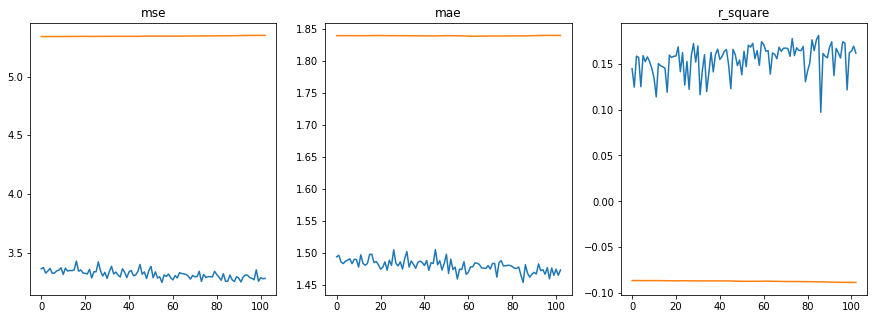

In [34]:
plot_track_training_regression(history)

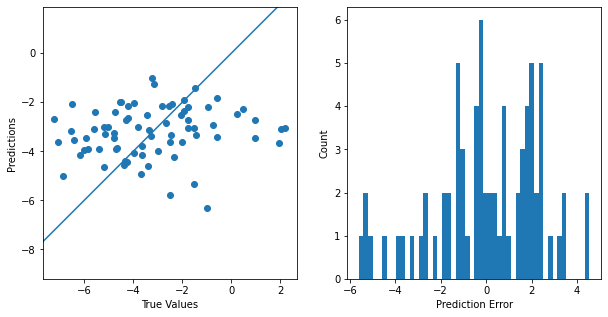

In [35]:
plot_prediction(Y_val, model.predict(X_val).flatten())

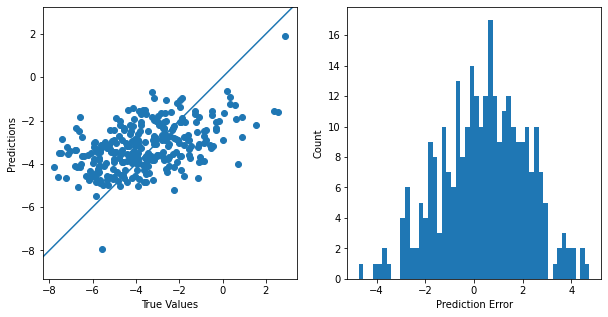

In [36]:
plot_prediction(Y_train, model.predict(X_train).flatten())